In [1]:
import pandas as pd
import numpy as np

In [2]:
#carregar os dados do arquivo txt
data = pd.read_csv('sant_716_2005.txt', delimiter='\t', header=None)


In [3]:
print(data.head())

            0      1      2
0  01/10/2005  02:00  3.244
1  01/10/2005  03:00  3.306
2  01/10/2005  04:00  3.049
3  01/10/2005  05:00  2.567
4  01/10/2005  06:00  2.085


In [4]:
data.columns = ['dt', 'hr', 'nivel']

In [5]:
#converter as colunas de data e hora para um projeto datetime
from datetime import datetime 

# Concatenando as colunas 'dt' e 'hr' e convertendo para o formato datetime
data['dt_hr'] = pd.to_datetime(data['dt'] + ' ' + data['hr'], format='%d/%m/%Y %H:%M')

In [6]:
data['nivel'].fillna(data['nivel'].mean(), inplace=True)

C:\Users\labdi\AppData\Local\Temp\ipykernel_27868\3256811076.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  data['nivel'].fillna(data['nivel'].mean(), inplace=True)


In [7]:
data['nivel_interp'] = data['nivel'].interpolate(method='linear')
data['nivel_interp'].fillna(data['nivel_interp'].mean(), inplace=True)

C:\Users\labdi\AppData\Local\Temp\ipykernel_27868\305828117.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  data['nivel_interp'].fillna(data['nivel_interp'].mean(), inplace=True)


In [8]:
#aplicar alguns filtros de media e o desvio padrão da coluna Nivel do mar
#calcular a média
mean_level = data['nivel_interp'].mean()
#calcular o desvio padrão
std_desv = data['nivel_interp'].std()

#definir os limites superior e inferior para eliminar os outlier
limite_superior = mean_level + 3 * std_desv
limite_inferior = mean_level - 3 * std_desv

#filtrar o dataframe para remover outliers
df_filtrado =data[(data['nivel_interp'] >= limite_inferior) & (data['nivel_interp'] <= limite_superior)]


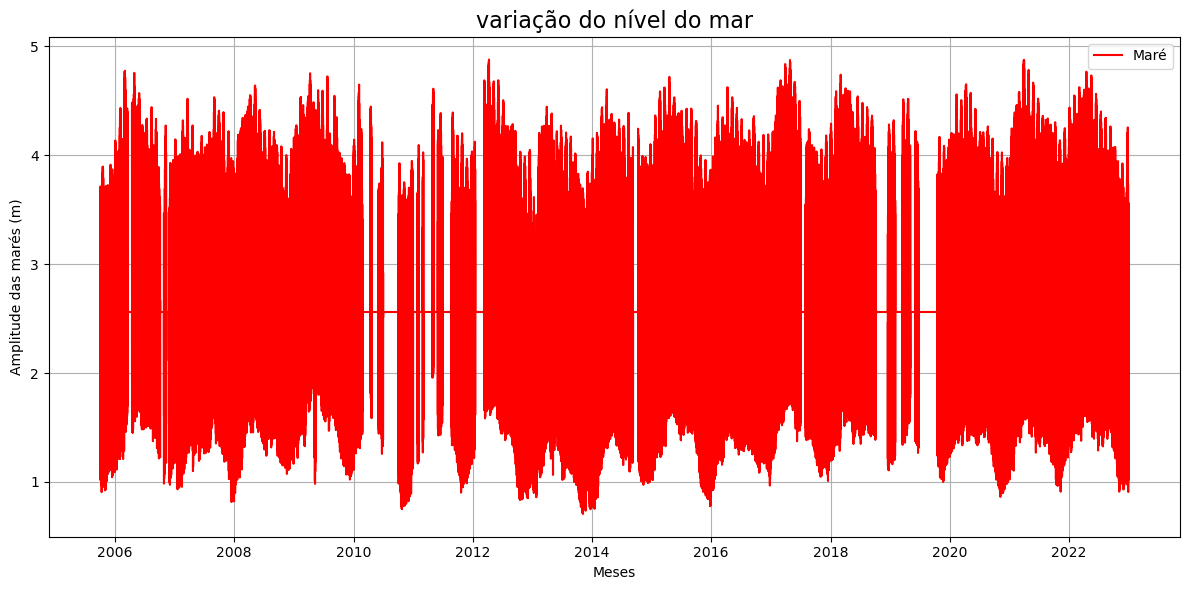

In [9]:
import matplotlib.pyplot as plt
# Plotagem do gráfico
plt.figure(figsize=(12, 6))
plt.plot(df_filtrado['dt_hr'], df_filtrado['nivel_interp'], 'r', label='Maré')

plt.title('variação do nível do mar', fontsize=16)
plt.legend(loc='best')
plt.xlabel('Meses')
plt.ylabel('Amplitude das marés (m)')
plt.grid(True)

plt.tight_layout()

In [10]:
# Calcular a média do nível do mar
media_level = 2.224

# Subtrair a média do nível do mar da coluna 'nivel'
df_filtrado['nivel'] = df_filtrado['nivel'] - media_level
df_filtrado['nivel'] = df_filtrado['nivel'] * 100

# Visualizar o DataFrame atualizado
print(df_filtrado)

                dt     hr  nivel               dt_hr  nivel_interp
0       01/10/2005  02:00  102.0 2005-10-01 02:00:00         3.244
1       01/10/2005  03:00  108.2 2005-10-01 03:00:00         3.306
2       01/10/2005  04:00   82.5 2005-10-01 04:00:00         3.049
3       01/10/2005  05:00   34.3 2005-10-01 05:00:00         2.567
4       01/10/2005  06:00  -13.9 2005-10-01 06:00:00         2.085
...            ...    ...    ...                 ...           ...
151217  31/12/2022  19:00 -109.3 2022-12-31 19:00:00         1.131
151218  31/12/2022  20:00  -56.0 2022-12-31 20:00:00         1.664
151219  31/12/2022  21:00   38.3 2022-12-31 21:00:00         2.607
151220  31/12/2022  22:00  108.0 2022-12-31 22:00:00         3.304
151221  31/12/2022  23:00  127.3 2022-12-31 23:00:00         3.497

[151222 rows x 5 columns]


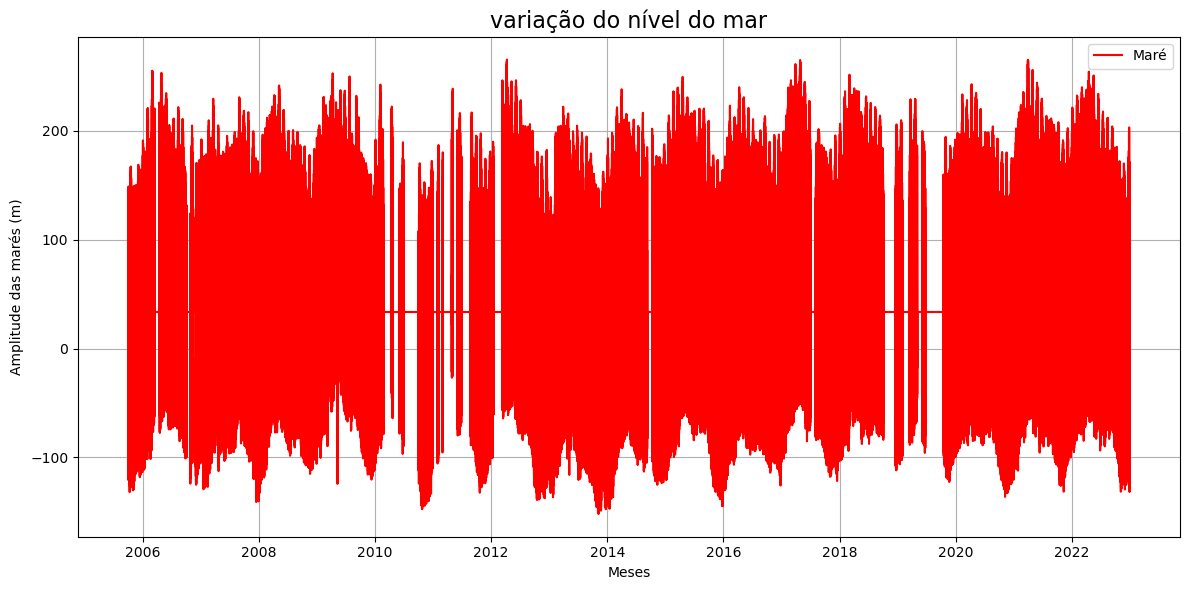

In [11]:
import matplotlib.pyplot as plt
# Plotagem do gráfico
plt.figure(figsize=(12, 6))
plt.plot(df_filtrado['dt_hr'], df_filtrado['nivel'], 'r', label='Maré')

plt.title('variação do nível do mar', fontsize=16)
plt.legend(loc='best')
plt.xlabel('Meses')
plt.ylabel('Amplitude das marés (m)')
plt.grid(True)

plt.tight_layout()

In [12]:
df_filtrado['dt_hr'] = pd.to_datetime(df_filtrado['dt_hr'])

In [13]:
#media_mensal = df_filtrado.resample('M', on='data_hora')['nivel'].mean()

# Converter a coluna 'data_hora' para o índice do DataFrame, se ainda não estiver
df_filtrado.set_index('dt_hr', inplace=True)

# Calcular a média mensal da coluna 'alt_zero' corresponde a altura após a subtração da 
media_mensal = df_filtrado['nivel'].resample('M').mean()

C:\Users\labdi\AppData\Local\Temp\ipykernel_27868\3482392900.py:7: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  media_mensal = df_filtrado['nivel'].resample('M').mean()


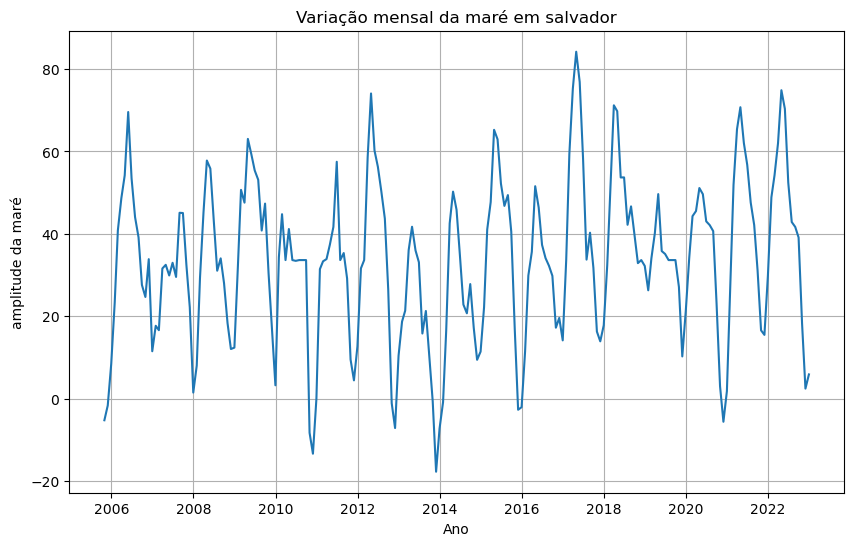

In [14]:
# Cria um gráfico de linha
plt.figure(figsize=(10, 6))  # Define o tamanho da figura
plt.plot(media_mensal)
plt.title("Variação mensal da maré em salvador")
plt.xlabel("Ano")
plt.ylabel("amplitude da maré")
plt.grid(True)
plt.show()

In [15]:
# Cria um novo DataFrame com as médias mensais de'data_hora' e alt_zero

df_mensal = pd.DataFrame({
    'dt_hr': media_mensal.index,
    'nivel': media_mensal.values
})

# Exibe o novo DataFrame com as médias mensais
print(df_mensal)

         dt_hr      nivel
0   2005-10-31  -5.238275
1   2005-11-30  -1.652361
2   2005-12-31   8.468683
3   2006-01-31  23.320430
4   2006-02-28  40.856845
..         ...        ...
202 2022-08-31  41.687634
203 2022-09-30  39.120972
204 2022-10-31  18.206989
205 2022-11-30   2.446944
206 2022-12-31   5.887903

[207 rows x 2 columns]


In [16]:
# Converter a coluna 'dt_hr' para o formato datetime
df_mensal['dt_hr'] = pd.to_datetime(df_mensal['dt_hr'])

In [17]:
# Construindo a matriz A0 para regressão linear
A0 = np.column_stack([np.ones(len(df_mensal)), df_mensal['dt_hr'].apply(lambda x: x.to_julian_date())])

x0 = np.linalg.lstsq(A0, df_mensal['nivel'], rcond=None)[0]
alt_est = A0.dot(x0) #tendencia estimada

In [19]:
import pandas as pd
from scipy.stats import linregress

# Convertendo a coluna de data_hora para o ano
df_mensal['ano'] = df_mensal['dt_hr'].dt.year

# Calculando a regressão linear
slope, intercept, r_value, p_value, std_err = linregress(df_mensal['ano'], df_mensal['nivel'])

# Tendência por ano (inclinação da reta)
tendencia_por_ano = slope

# Grau de incerteza
incerteza = std_err


print("Tendência por ano:", tendencia_por_ano)
print("Incerteza:", incerteza)

Tendência por ano: 0.6891077505346856
Incerteza: 0.2712927212253342


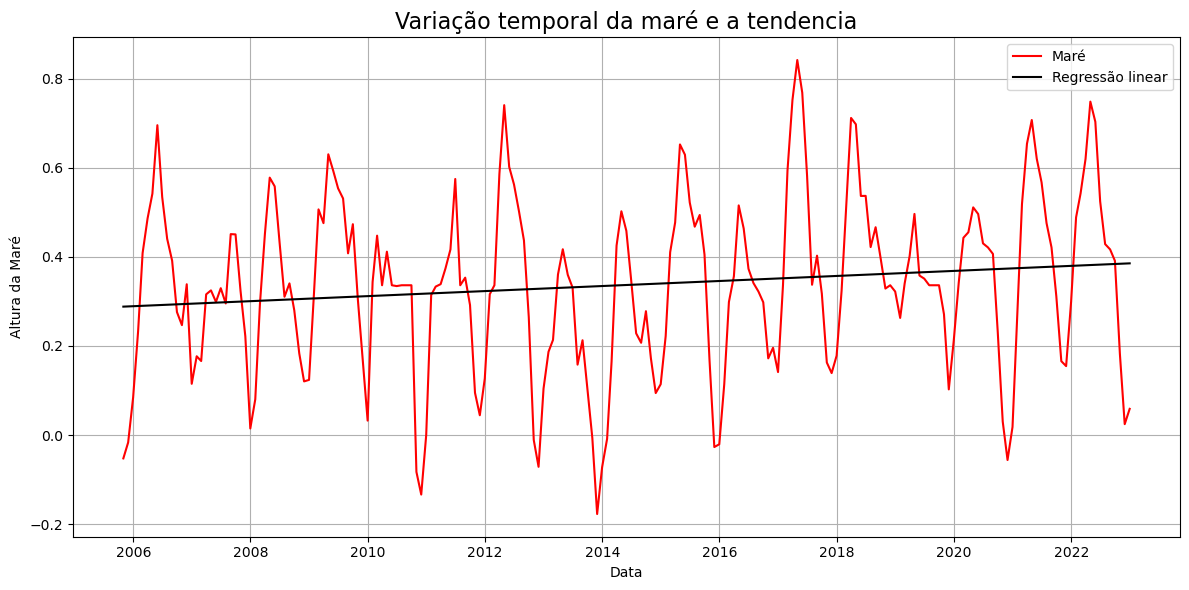

In [18]:
# Importe a biblioteca Matplotlib
import matplotlib.pyplot as plt

# Resolução desejada
dpi = 300
#Trend = '0,24 ± 0,03'  # Defina o valor da tendência

# Plotagem do gráfico
plt.figure(figsize=(12, 6))
plt.plot(df_mensal['dt_hr'], df_mensal['nivel'], 'b', label='Maré')
#plt.plot(df_mensal['data_hora'], df_mensal['nivel_do_mar_interp'], linestyle='--', color='b', label='Maré')  # Corrigido aqui
#plt.plot(df_mensal['data_hora'], tendencia, 'r', label='Regressão linear', 'lineWidth', 1.5)
plt.plot(data1['Data1'], tendencia, 'r', label='Regressão linear', linewidth=1.5)


# Adicione o valor da tendência linear abaixo da legenda
plt.text(0.77, 0.02, f'Tend: {Trend} cm/ano', transform=plt.gca().transAxes, fontsize=12, bbox=dict(facecolor='w', edgecolor='none', alpha=0.5))

#plt.title('Nível médio anual mar em Santana', fontsize=12)
plt.legend(loc='upper left')
plt.xlabel('Anos')
plt.ylabel('Amplitude (cm)', fontsize=8)
plt.grid(True)
# Define os limites e os marcadores dos eixos y
plt.ylim(44 , 56)
plt.yticks(range(44, 57, 2))
# Define o formato do eixo x para mostrar anos e meses (AAAA, MM)
# Salvar a figura
#plt.savefig('D:/graficos/Tendencia/nivel_medio_anual_Santana_semtitiutlo.png', dpi=dpi)  # Salva a figura com a resolução especificada


plt.tight_layout()
plt.show()

In [19]:
# Formatar datas em numérico representando os anos e meses em um formato decimal.
df_mensal['tempo'] = df_mensal['dt_hr'].dt.year + (df_mensal['dt_hr'].dt.month - 1) / 12

In [20]:
# Regressão Linear
A1 = np.column_stack([np.ones(len(df_mensal)), df_mensal['tempo']])
x1 = np.linalg.lstsq(A1, df_mensal['nivel'], rcond=None)[0]
alt1 = A1.dot(x1)

In [21]:
# Regressão Quadrática
A2 = np.column_stack([np.ones(len(df_mensal)), df_mensal['tempo'], df_mensal['tempo']**2])
x2 = np.linalg.lstsq(A2, df_mensal['nivel'], rcond=None)[0]
alt2 = A2.dot(x2)

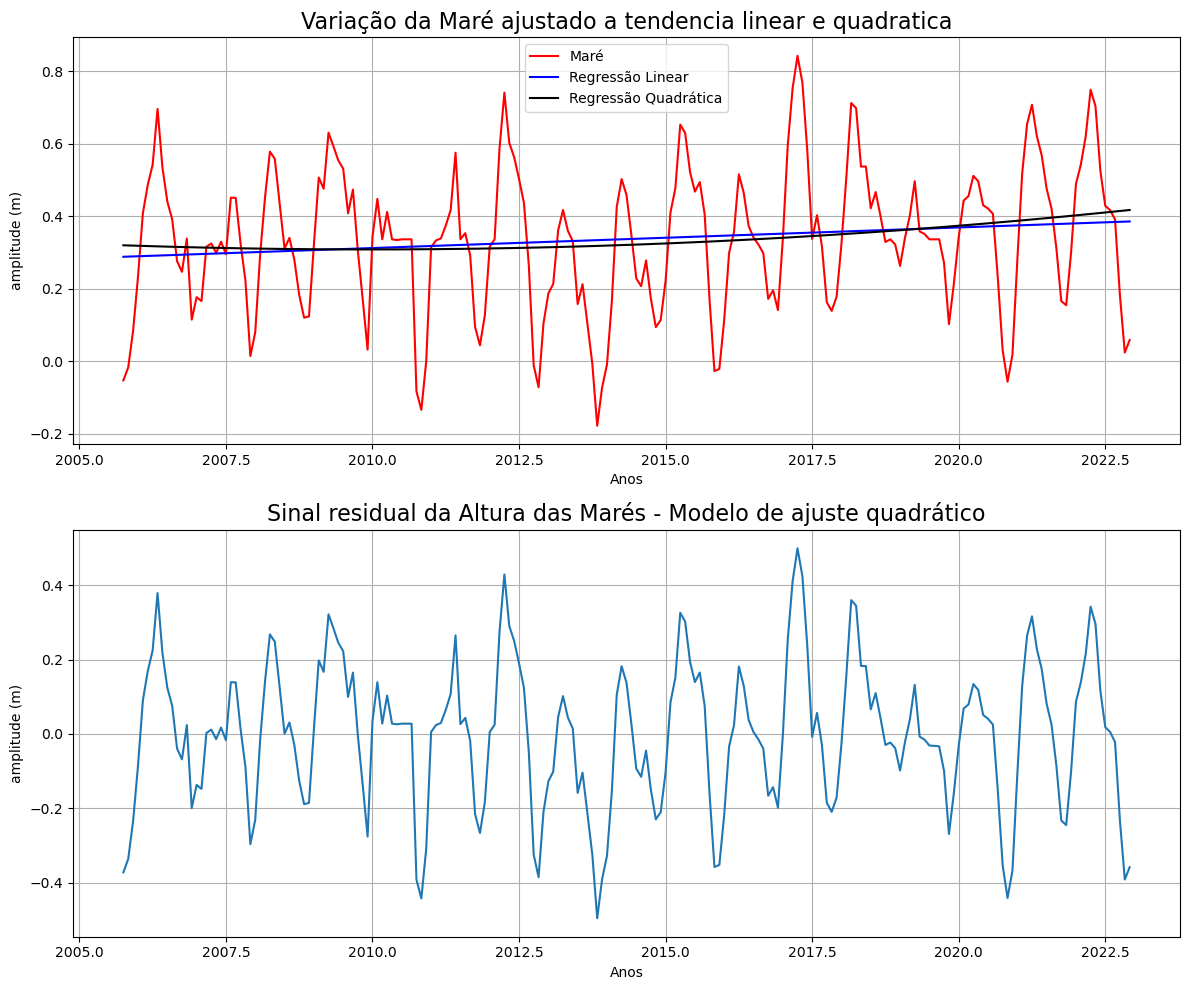

In [22]:
# Plotagem dos gráficos
plt.figure(figsize=(12, 10))

plt.subplot(2, 1, 1)
#plt.plot(df['tempo_dec'], df['alt_zero'], 'r', label='Maré')
plt.plot(df_mensal['tempo'], df_mensal['nivel'], 'r', label='Maré')
plt.title('Variação da Maré ajustado a tendencia linear e quadratica', fontsize=16)
plt.xlabel('Anos')
plt.ylabel('amplitude (m)')
plt.grid(True)
plt.plot(df_mensal['tempo'], alt1, 'b', label='Regressão Linear')
plt.plot(df_mensal['tempo'], alt2, 'k', label='Regressão Quadrática')
plt.legend()

plt.subplot(2, 1, 2)
plt.plot(df_mensal['tempo'], df_mensal['nivel'] - alt2)
plt.title('Sinal residual da Altura das Marés - Modelo de ajuste quadrático', fontsize=16)
plt.xlabel('Anos')
plt.ylabel('amplitude (m)')
plt.grid(True)

plt.tight_layout()
plt.show()

In [23]:
# Construindo a matriz A3 para regressão linear
A3 = np.column_stack([np.ones(len(df_mensal['tempo'])), df_mensal['tempo']])
x3 = np.linalg.lstsq(A3, df_mensal['nivel'], rcond=None)[0]
alt3 = A3.dot(x3)

In [24]:
#sinal das marés sem tendencia linear.
alt_sem_tend = df_mensal['nivel'] - alt3

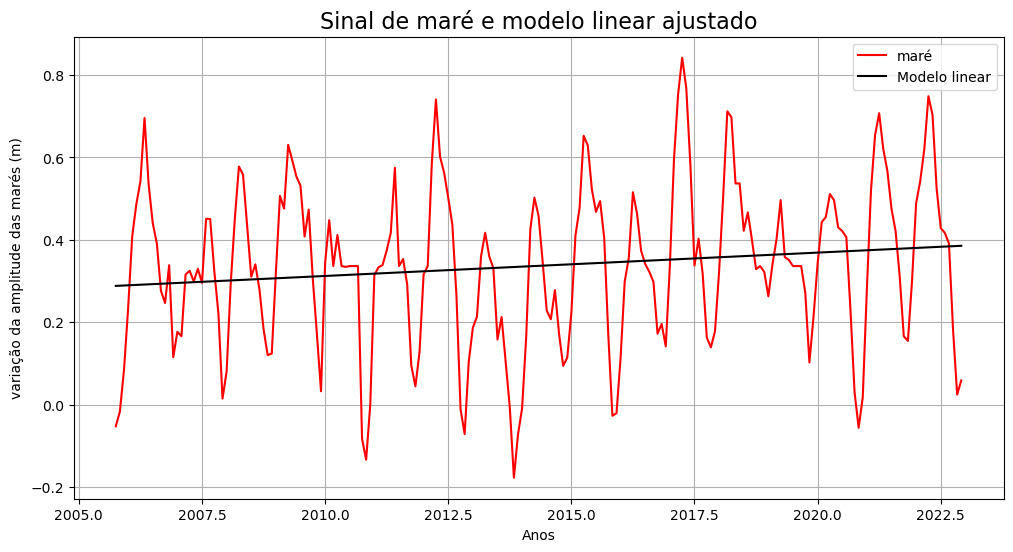

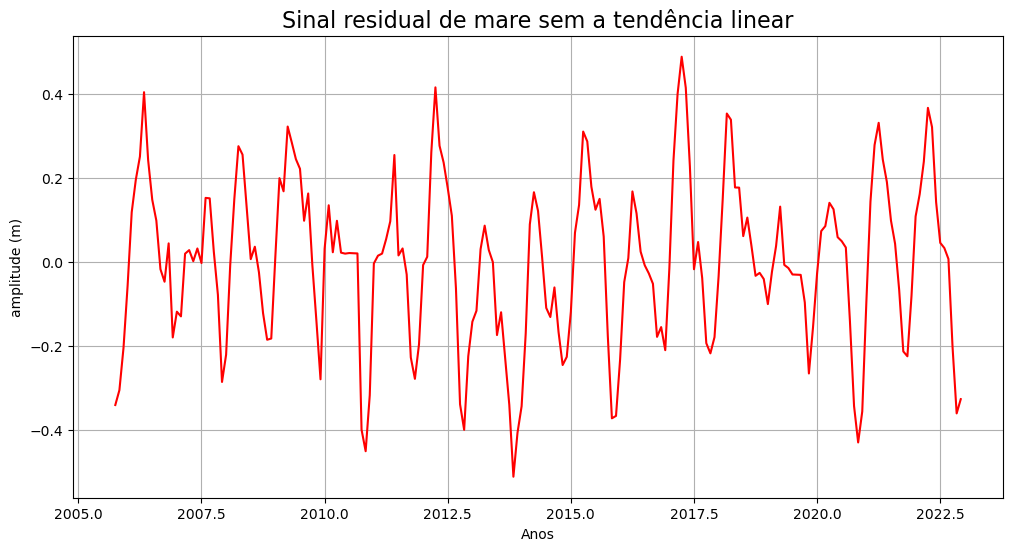

In [25]:
#Gráfico com as curvas de maré e modelo linear ajustado superpostas em cores diferentes.
plt.figure(figsize=(12, 6))
plt.plot(df_mensal['tempo'], df_mensal['nivel'], 'r', label='maré')
plt.plot(df_mensal['tempo'], alt3, 'k', label='Modelo linear')
plt.title('Sinal de maré e modelo linear ajustado', fontsize=16)
plt.legend(loc='best')
plt.xlabel('Anos')
plt.ylabel('variação da amplitude das marés (m)')
plt.grid(True)
plt.show()

# Gráfico da série de maré sem a tendência linear (residuo).
plt.figure(figsize=(12, 6))
plt.plot(df_mensal['tempo'], alt_sem_tend, 'r')
plt.title('Sinal residual de mare sem a tendência linear', fontsize=16)
plt.xlabel('Anos')
plt.ylabel('amplitude (m)')
plt.grid(True)
plt.show()


In [26]:
# Construindo a matriz para regressão quadrática
A4 = np.column_stack([np.ones(len(df_mensal['tempo'])), df_mensal['tempo'], df_mensal['tempo'] ** 2])
x4 = np.linalg.lstsq(A4, df_mensal['nivel'], rcond=None)[0]
mare_mod1 = A4.dot(x4)

In [27]:
# Calculando a série residual, alt_sem_tend2 sem tendencia quadrática (mare_mod1)
#alt_sem_tend2 = df['alt_zero'] - mare_mod1
alt_sem_tend2 = df_mensal['nivel'] - mare_mod1

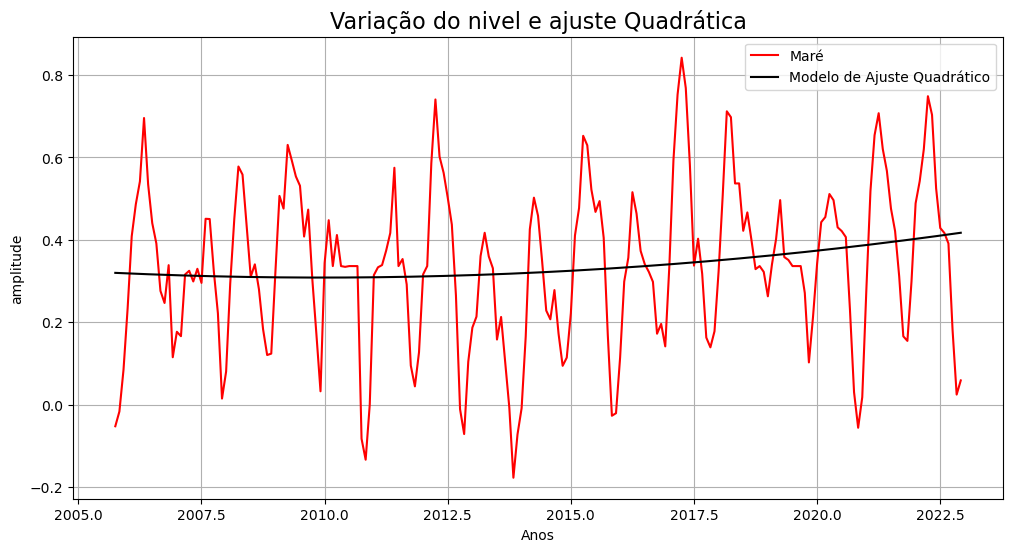

In [28]:
# Configuração do gráfico
plt.figure(figsize=(12, 6))

# Gráfico de linhas para a variação do nível do mar em vermelho ('r')
plt.plot(df_mensal['tempo'], df_mensal['nivel'], 'r', label='Maré')
#plt.plot(df_mensal['tempo'], df_mensal['nivel'], 'r', label='Maré')
# Gráfico de linhas para o modelo quadrático ajustado (mare_mod1) em preto ('k')
plt.plot(df_mensal['tempo'], mare_mod1, 'k', label='Modelo de Ajuste Quadrático')

# Configuração do título e legendas
plt.title('Variação do nivel e ajuste Quadrática', fontsize=16)
plt.xlabel('Anos')
plt.ylabel('amplitude')
plt.legend()
plt.grid(True)

# Exibição do gráfico
plt.show()

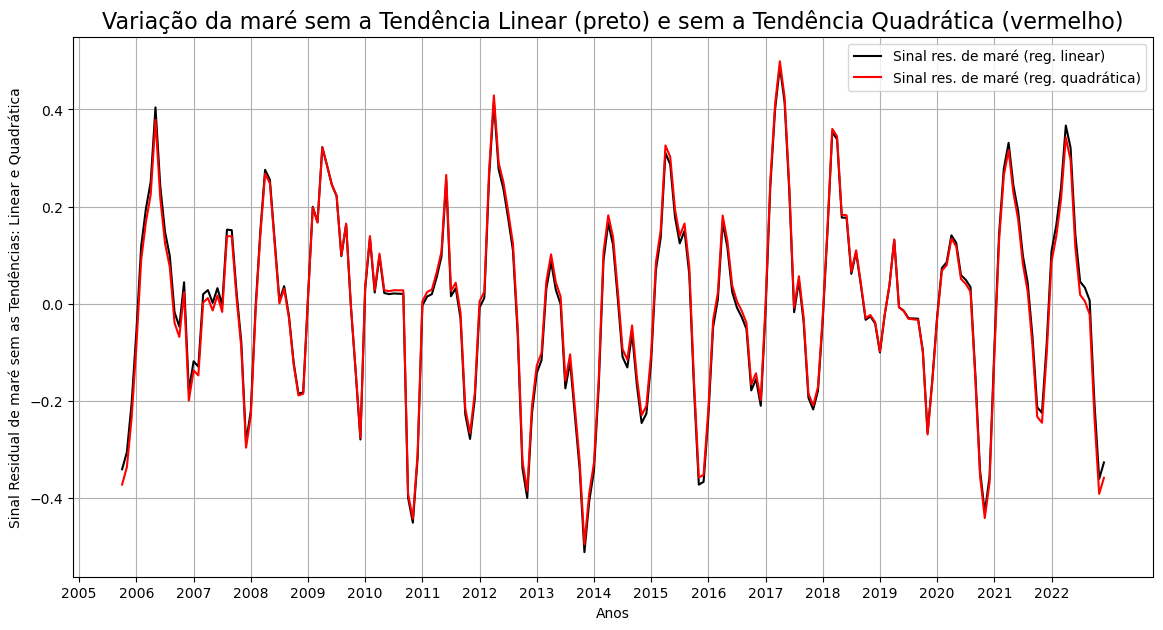

In [29]:
# Configuração do gráfico
plt.figure(figsize=(12, 6))
plt.subplots_adjust(left=0.05, right=0.95, top=0.95, bottom=0.05)  # Ajuste das margens

# Gráfico de linhas para alt_sem_tend em preto ('k')
plt.plot(df_mensal['tempo'], alt_sem_tend, 'k', label='Sinal res. de maré (reg. linear)')

# Gráfico de linhas para alt_sem_tend2 em vermelho ('r')
plt.plot(df_mensal['tempo'], alt_sem_tend2, 'r', label='Sinal res. de maré (reg. quadrática)')

# Configurações do título e legendas
plt.title('Variação da maré sem a Tendência Linear (preto) e sem a Tendência Quadrática (vermelho)', fontsize=16)
plt.xlabel('Anos')
plt.ylabel('Sinal Residual de maré sem as Tendências: Linear e Quadrática')
plt.xticks(range(2005, 2023))
plt.legend()
plt.box(on=True)
plt.grid(True)

# Exibição do gráfico
plt.show()

In [30]:
# Construindo a matriz A5 para regressão linear
A5 = np.column_stack([
    np.ones(len(df_mensal['tempo'])),
    np.sin(2 * np.pi * df_mensal['tempo']),
    np.cos(2 * np.pi * df_mensal['tempo']),
    np.sin(4 * np.pi * df_mensal['tempo']),
    np.cos(4 * np.pi * df_mensal['tempo'])
])

# Realizando a regressão linear para encontrar os coeficientes x5
x5 = np.linalg.lstsq(A5, alt_sem_tend2, rcond=None)[0]

# Calculando a série prevista a partir da multiplicação de A5 por x5
mare_mod2 = A5.dot(x5)

# Calculando a série residual
alt_sem_tend3 = df_mensal['nivel'] - mare_mod2

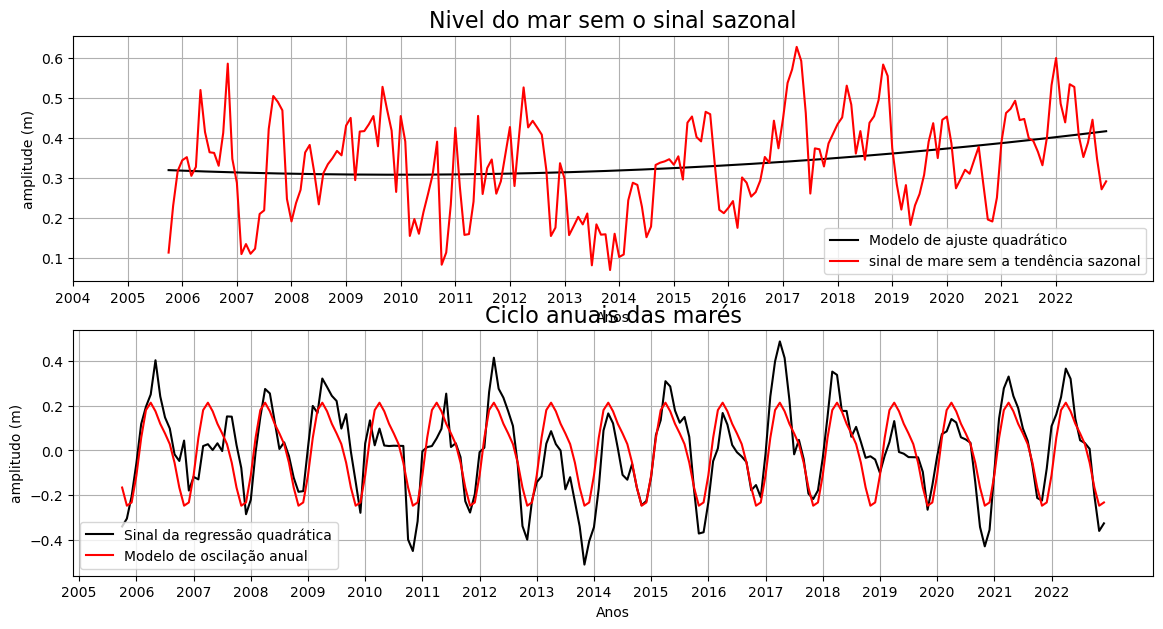

In [31]:
# Configuração do gráfico
plt.figure(figsize=(12, 6))
plt.subplots_adjust(left=0.05, right=0.95, top=0.95, bottom=0.05)  # Ajuste das margens

# Subplot 1
plt.subplot(2, 1, 1)
plt.plot(df_mensal['tempo'], mare_mod1, 'k', label='Modelo de ajuste quadrático')
plt.plot(df_mensal['tempo'], alt_sem_tend3, 'r', label='sinal de mare sem a tendência sazonal')
plt.title('Nivel do mar sem o sinal sazonal', fontsize=16)
plt.legend(loc='best')
plt.xlabel('Anos')
plt.ylabel('amplitude (m)')
plt.xticks(range(2004, 2023))
plt.box(on=True)
plt.grid(True)

# Subplot 2
plt.subplot(2, 1, 2)
plt.plot(df_mensal['tempo'], alt_sem_tend, 'k', label='Sinal da regressão quadrática')
plt.plot(df_mensal['tempo'], mare_mod2, 'r', label='Modelo de oscilação anual')
plt.title('Ciclo anuais das marés', fontsize=16)
plt.legend(loc='best')
plt.xlabel('Anos')
plt.ylabel('amplitudo (m)')
plt.xticks(range(2005, 2023))
plt.box(on=True)
plt.grid(True)

# Exibição do gráfico
plt.show()

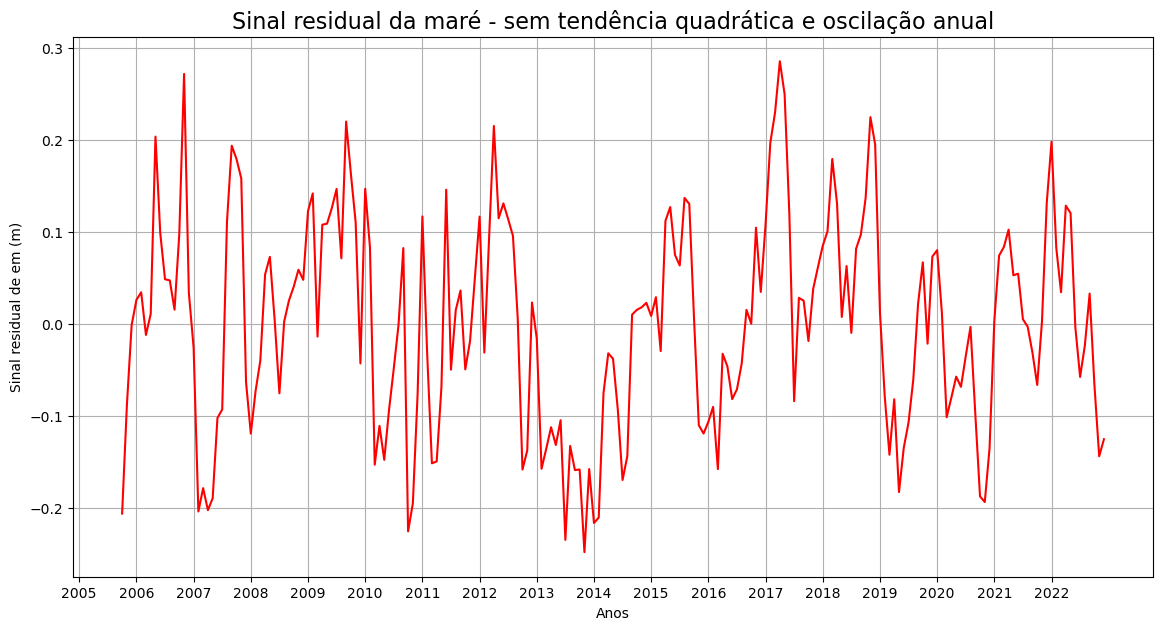

In [32]:
# Cálculo do sinal residual da maré
alt_sem_tem4 = df_mensal['nivel'] - mare_mod1 - mare_mod2

# Configuração do gráfico
plt.figure(figsize=(12, 6))
plt.subplots_adjust(left=0.05, right=0.95, top=0.95, bottom=0.05)  # Ajuste das margens

# Plot do sinal residual da maré
plt.plot(df_mensal['tempo'], alt_sem_tem4, 'r')
plt.title('Sinal residual da maré - sem tendência quadrática e oscilação anual', fontsize=16)
plt.xlabel('Anos')
plt.ylabel('Sinal residual de em (m)')
plt.xticks(range(2005, 2023))
plt.box(on=True)
plt.grid(True)

# Exibição do gráfico
plt.show()

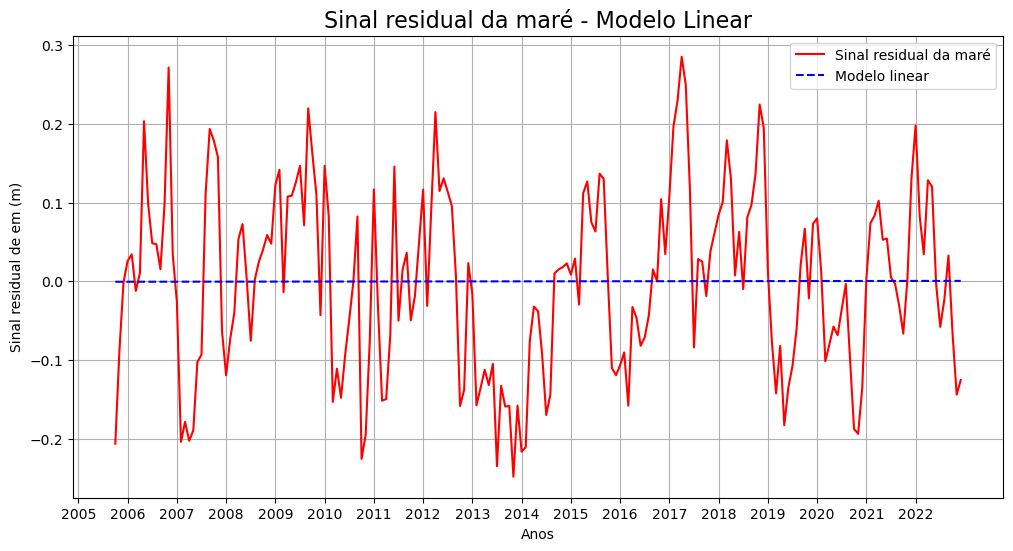

In [33]:
import numpy as np
import matplotlib.pyplot as plt

# Criar a matriz de características para o modelo linear
A4 = np.column_stack([np.ones(len(df_mensal['tempo'])), df_mensal['tempo']])

# Realizar a regressão linear para encontrar os coeficientes
coefficients = np.linalg.lstsq(A4, alt_sem_tem4, rcond=None)[0]

# Calcular o sinal previsto pelo modelo linear
sinal_previsto = A4.dot(coefficients)

# Plotar o gráfico do sinal residual da maré e o modelo linear
plt.figure(figsize=(12, 6))
plt.plot(df_mensal['tempo'], alt_sem_tem4, 'r', label='Sinal residual da maré')
plt.plot(df_mensal['tempo'], sinal_previsto, 'b--', label='Modelo linear')
plt.title('Sinal residual da maré - Modelo Linear', fontsize=16)
plt.xlabel('Anos')
plt.ylabel('Sinal residual de em (m)')
plt.xticks(range(2005, 2023))
plt.legend()
plt.box(on=True)
plt.grid(True)

# Exibir o gráfico
plt.show()


In [34]:
# Calcular a média móvel de 12 períodos com janelas centradas
df_mensal['Media_Movel_12'] = df_mensal['nivel'].rolling(window=12, center=True).sum()

In [35]:
df_mensal['Media_Movel_2_Centrada'] = df_mensal['Media_Movel_12'].rolling(window=2, center=True).sum()

In [36]:
# Calculando a média móvel centrada dividida por 24
df_mensal['Media_Movel_Centrada'] = df_mensal['Media_Movel_2_Centrada'] / 24

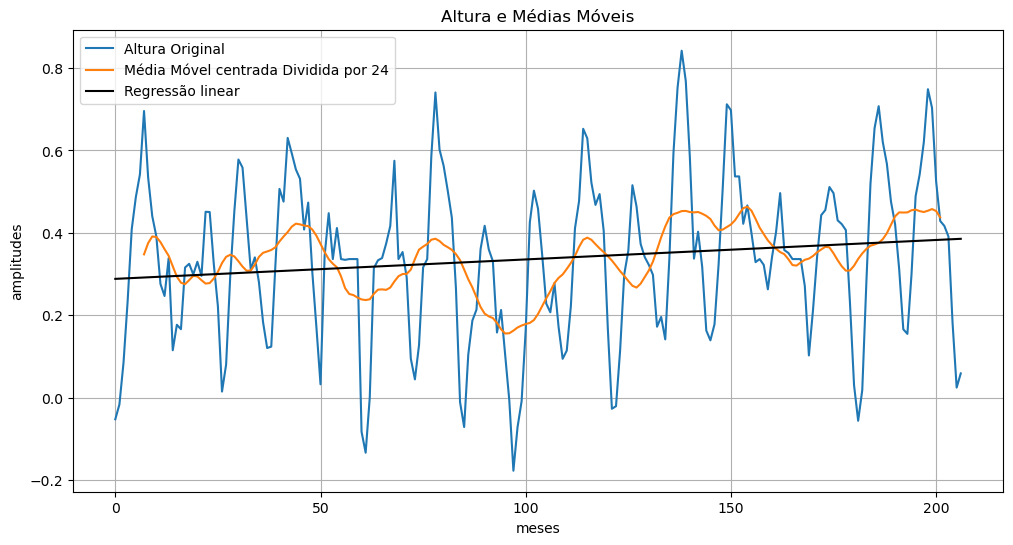

In [37]:
# Plotar as alturas originais
plt.figure(figsize =(12, 6))
plt.plot(df_mensal['nivel'], label='Altura Original')

# Plotar a média móvel de período 12
#plt.plot(data['Media_Movel_12'], label='Média Móvel de 12 Períodos')

# Plotar a média móvel centrada dividida por 24
#plt.plot(data['Media_Movel_2_Centrada'], label='Média Móvel 2 Centrada ')

plt.plot(df_mensal['Media_Movel_Centrada'], label= 'Média Móvel centrada Dividida por 24')
plt.plot(alt_est, 'k', label='Regressão linear')
# Adicionar rótulos e legendas
plt.xlabel('meses')
plt.ylabel('amplitudes')
plt.title('Altura e Médias Móveis')
plt.legend()
plt.grid()
# Mostrar o gráfico
plt.show()

In [38]:
# Calcular os índices sazonais subtraindo a média móvel centrada da altura original
df_mensal['indices_sazonais'] = df_mensal['nivel'] - df_mensal['Media_Movel_Centrada']

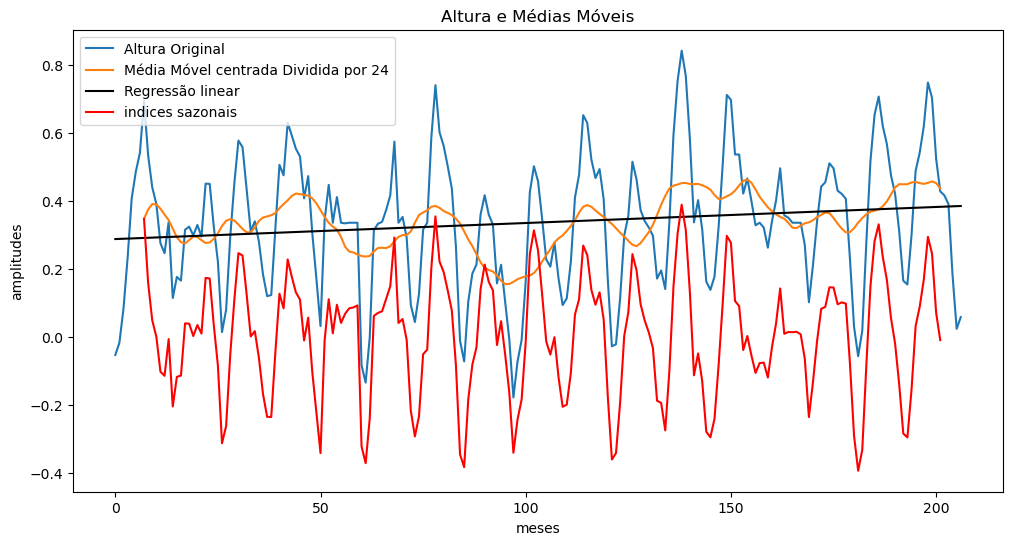

In [39]:
# Plotar as alturas originais
plt.figure(figsize=(12, 6))
# Plotar as alturas originais
plt.plot(df_mensal['nivel'], label='Altura Original')


plt.plot(df_mensal['Media_Movel_Centrada'], label= 'Média Móvel centrada Dividida por 24')
plt.plot(alt_est, 'k', label='Regressão linear')
# Adicionar rótulos e legendas

plt.plot(df_mensal['indices_sazonais'], 'r', label='indices sazonais')
# Adicionar rótulos e legendas
plt.xlabel('meses')
plt.ylabel('amplitudes')
plt.title('Altura e Médias Móveis')
plt.legend()

# Mostrar o gráfico
plt.show()

In [40]:
#filtrar os dados para cada mês toda serie temporal
mensal01 = df_mensal['dt_hr'].dt.month

In [41]:
#adicionar acoluna de meses no Dataframe como 'mensal'
df_mensal['mensal'] = df_mensal['dt_hr'].dt.month

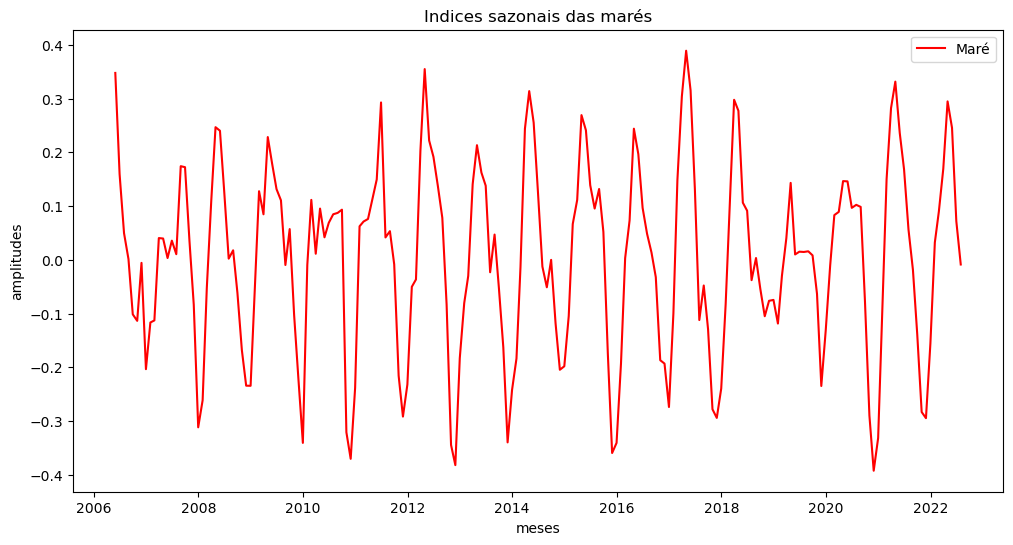

In [42]:
# Plotagem do gráfico
plt.figure(figsize=(12, 6))
plt.plot(df_mensal['dt_hr'], df_mensal['indices_sazonais'], 'r', label='Maré')
plt.xlabel('meses')
plt.ylabel('amplitudes')
plt.title('Indices sazonais das marés')
plt.legend()

# Mostrar o gráfico
plt.show()

In [43]:
#liste de nomes dos meses 
meses = ['dezembro', 'janeiro', 'fevereiro', 
        'março', 'abril', 'maio',
        'junho', 'julho', 'agosto',
        'setembro', 'outubro', 'novembro']
# dicionário para armazenar os filtros de cada mês
filtros_meses = {}

# loop através dos meses
for mes in range(1, 13):
    #filtrar os dados para incluir apenas o mês atual
    filtros_meses[meses[mes-1]] = df_mensal[df_mensal['dt_hr'].dt.month == mes]

#dicionário para armazenar as médias dos indices sazonais para cada meês
medias_ind_sazonal = {}
for mes in meses:
    #calcular a media dos índices sazonais para o mês atual
    medias_ind_sazonal[mes] = filtros_meses[mes]['indices_sazonais'].mean()

In [44]:
medias_ind_sazonal

{'dezembro': -0.08396556648356424,
 'janeiro': 0.042225419031856094,
 'fevereiro': 0.1422879170718423,
 'março': 0.23132814270504815,
 'abril': 0.18218044277274065,
 'maio': 0.12236691159096544,
 'junho': 0.03285505838430947,
 'julho': 0.037135091143455576,
 'agosto': -0.022218302188734742,
 'setembro': -0.1808868531463096,
 'outubro': -0.24881043493293667,
 'novembro': -0.2333227237848591}

In [45]:
# Criando o DataFrame
df1 = pd.DataFrame(list(medias_ind_sazonal.items()), columns=['mes_nome', 'media_indice_sazonal'])
df1


,mes_nome,media_indice_sazonal
0,dezembro,-0.083966
1,janeiro,0.042225
2,fevereiro,0.142288
3,março,0.231328
4,abril,0.182180
5,maio,0.122367
6,junho,0.032855
7,julho,0.037135
8,agosto,-0.022218
9,setembro,-0.180887


In [46]:
#Fazendo a soma, para que dei 0 segundo a definição do modelo adetivo o somatorio das média dos indices sazonais tem que ser igual a zero
soma_md_indices = sum(df1['media_indice_sazonal'])
soma_md_indices

0.021175102163813325

In [47]:
#calcular o excesso
excesso = soma_md_indices/12
excesso

0.0017645918469844438

In [48]:
#indices corrigidos
df1['media_indice_corrigido'] = df1['media_indice_sazonal'] - excesso
df1

,mes_nome,media_indice_sazonal,media_indice_corrigido
0,dezembro,-0.083966,-0.085730
1,janeiro,0.042225,0.040461
2,fevereiro,0.142288,0.140523
3,março,0.231328,0.229564
4,abril,0.182180,0.180416
5,maio,0.122367,0.120602
6,junho,0.032855,0.031090
7,julho,0.037135,0.035370
8,agosto,-0.022218,-0.023983
9,setembro,-0.180887,-0.182651


In [49]:
import scipy.io as sio
# Salvar o DataFrame em um arquivo .mat
sio.savemat('Santana.mat', {'Santana': df1.to_dict(orient='list')})

In [50]:
#df1.to_csv('D:/Sazonalidade/dataframe_sazonalidades/sazonalidade_Santana.csv', index=False)

In [51]:
sum(df1['media_indice_corrigido'])

2.220446049250313e-16

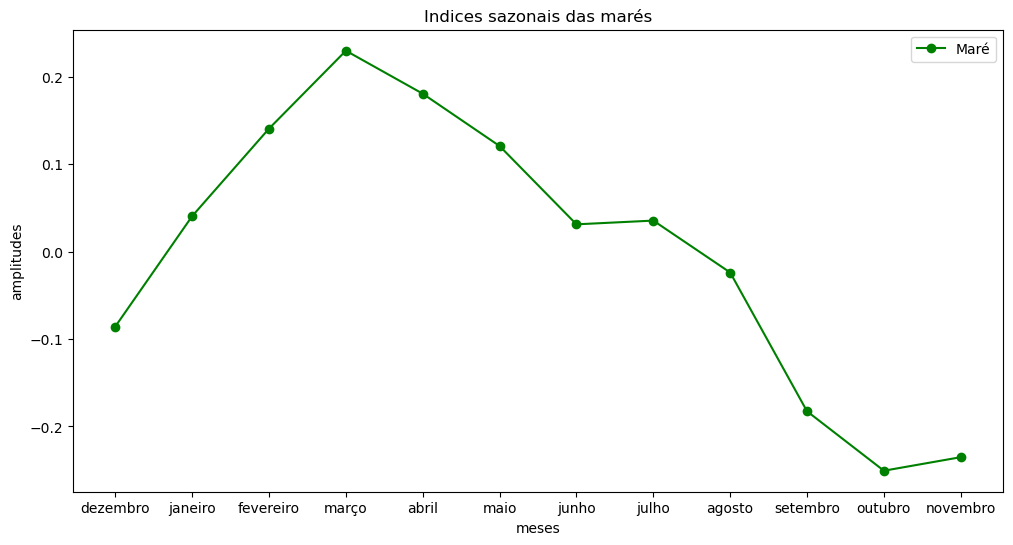

In [52]:
# Plotagem do gráfico
plt.figure(figsize=(12, 6))
plt.plot(df1['mes_nome'], df1['media_indice_corrigido'], marker='o', color='g', label='Maré') 
plt.xlabel('meses')
plt.ylabel('amplitudes')
plt.title('Indices sazonais das marés')
plt.legend()

# Mostrar o gráfico
plt.show()

In [53]:
# Supondo que 'data' seja o nome do seu DataFrame
df_mensal['tempo'] = pd.to_datetime(df_mensal['tempo'])

# Criando a nova coluna 'anomes' no formato YYYY-MM
df_mensal['anomes'] = df_mensal['tempo'].dt.strftime('%Y-%m')

In [54]:
# Dicionário para mapear nome do mês para número do mês
meses = {
    'janeiro': 1,
    'fevereiro': 2,
    'março': 3,
    'abril': 4,
    'maio': 5,
    'junho': 6,
    'julho': 7,
    'agosto': 8,
    'setembro': 9,
    'outubro': 10,
    'novembro': 11,
    'dezembro': 12
}

# Mapeando o nome do mês para o número do mês usando o dicionário 'meses'
df1['mes'] = df1['mes_nome'].map(meses)

#ordenando os meses pra ficar bonitinho
df1 = df1.sort_values(by='mes')

In [55]:
#Criando a nova coluna e adcionando a média pra cada respectivo mês do df
df_mensal['indices_sazonais'] = df_mensal['mensal'].map(df1.set_index('mes')['media_indice_corrigido'])
df_mensal

,dt_hr,nivel,tempo,Media_Movel_12,Media_Movel_2_Centrada,Media_Movel_Centrada,indices_sazonais,mensal,anomes
0,2005-10-31,-0.052383,1970-01-01 00:00:00.000002005,NaN,NaN,NaN,-0.250575,10,1970-01
1,2005-11-30,-0.016524,1970-01-01 00:00:00.000002005,NaN,NaN,NaN,-0.235087,11,1970-01
2,2005-12-31,0.084687,1970-01-01 00:00:00.000002005,NaN,NaN,NaN,-0.085730,12,1970-01
3,2006-01-31,0.233204,1970-01-01 00:00:00.000002006,NaN,NaN,NaN,0.040461,1,1970-01
4,2006-02-28,0.408568,1970-01-01 00:00:00.000002006,NaN,NaN,NaN,0.140523,2,1970-01
...,...,...,...,...,...,...,...,...,...
202,2022-08-31,0.416876,1970-01-01 00:00:00.000002022,NaN,NaN,NaN,-0.023983,8,1970-01
203,2022-09-30,0.391210,1970-01-01 00:00:00.000002022,NaN,NaN,NaN,-0.182651,9,1970-01
204,2022-10-31,0.182070,1970-01-01 00:00:00.000002022,NaN,NaN,NaN,-0.250575,10,1970-01
205,2022-11-30,0.024469,1970-01-01 00:00:00.000002022,NaN,NaN,NaN,-0.235087,11,1970-01


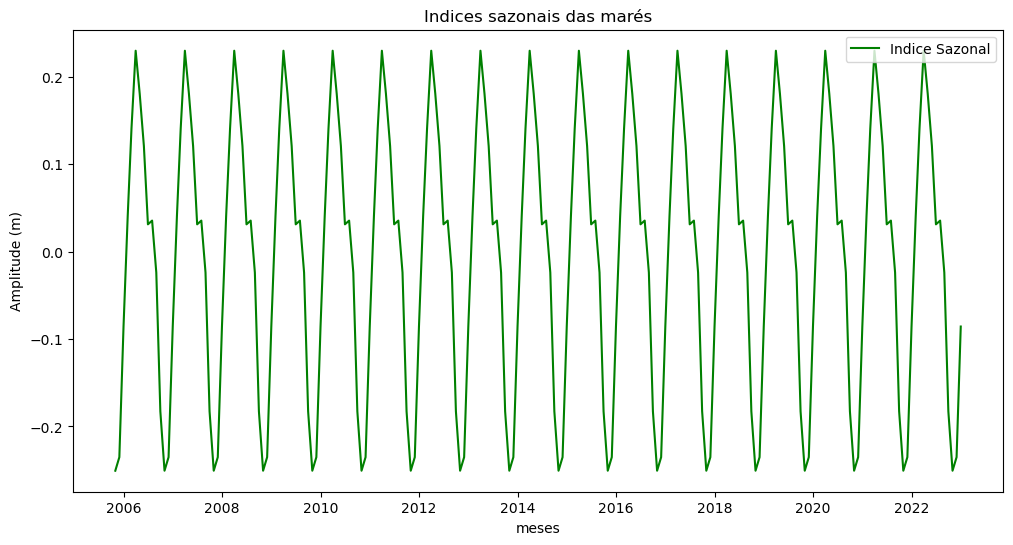

In [56]:
# Plotagem do gráfico
plt.figure(figsize=(12, 6))
plt.plot(df_mensal['dt_hr'], df_mensal['indices_sazonais'], 'g', label='Indice Sazonal')
plt.xlabel('meses')
plt.ylabel('Amplitude (m)')
plt.title('Indices sazonais das marés')
plt.legend()

# Mostrar o gráfico
plt.show()

In [57]:
# ciclo anual
df_mensal['ciclo_anual'] = df_mensal['nivel'] - alt_est - df_mensal['indices_sazonais']

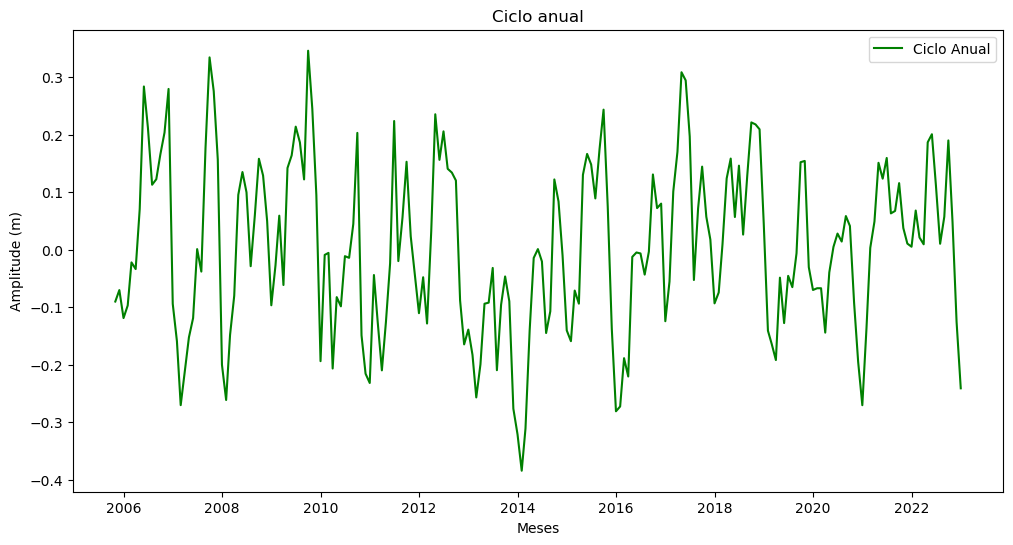

In [58]:
# Plotagem do gráfico
plt.figure(figsize=(12, 6))
plt.plot(df_mensal['dt_hr'], df_mensal['ciclo_anual'], 'g', label='Ciclo Anual')
plt.xlabel('Meses')
plt.ylabel('Amplitude (m)')
plt.title('Ciclo anual')
plt.legend()

# Mostrar o gráfico
plt.show()

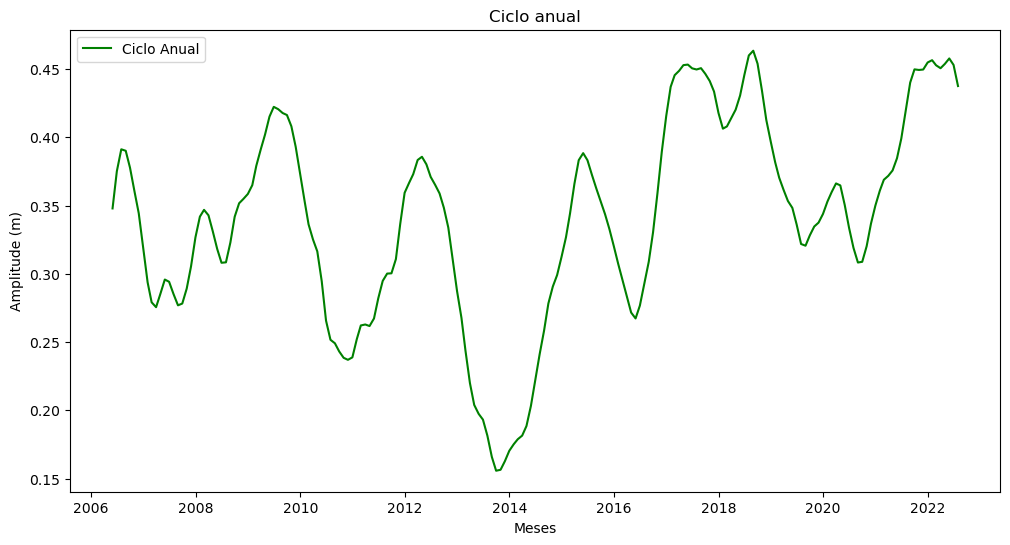

In [59]:
# Plotagem do gráfico
plt.figure(figsize=(12, 6))
plt.plot(df_mensal['dt_hr'], df_mensal['Media_Movel_Centrada'], 'g', label='Ciclo Anual')
plt.xlabel('Meses')
plt.ylabel('Amplitude (m)')
plt.title('Ciclo anual')
plt.legend()

# Mostrar o gráfico
plt.show()

In [60]:
df_mensal.to_csv('D:/Sazonalidade/dataframe_sazonalidades/variação_interna_Santana.csv', index=False)